In [1]:
# general 
import pandas as pd 
import numpy as np 
from datetime import datetime

# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# plotting
import seaborn as sns 
#import plotly.express as px
import matplotlib.pyplot as plt

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [78]:
movies_df = pd.read_csv('~/Desktop/stats 170b/Movie tweets.csv')

In [2]:
movies_df = pd.read_csv('~/Desktop/stats 170b/movie_details_clean.csv')

In [3]:
df1 = movies_df['Movie'].value_counts()
#df1 = movies_df.Movies.value_counts

In [4]:
df1

Avengers Endgame (2019)              73485
Thor: Ragnarok (2017)                26973
Get Out (I) (2017)                   25125
Joker (2019)                         21694
Coco (2017)                          20668
                                     ...  
The Trial of the Chicago 7 (2020)       28
The Two Popes (2019)                    25
The King’s Man (2021)                   17
Turning Red (2022)                      12
Can You Keep a Secret? (2019)            9
Name: Movie, Length: 100, dtype: int64

In [5]:
movies_df.head()

,user.id,create_at,text,Movie
0,1.210000e+18,12/5/21,Great look at this up coming movie. Great inte...,Don’t Look Up (2021)
1,1.150000e+18,12/6/21,"Idk why but ""Man in The Iron Mask"" is such a g...",Don’t Look Up (2021)
2,2.853195e+07,12/6/21,Leonardo DiCaprio and Jennifer Lawrence just g...,Don’t Look Up (2021)
3,1.450000e+18,12/9/21,'Winning Time: The Rise Of The Lakers Dynasty'...,Don’t Look Up (2021)
4,2.791928e+08,12/10/21,@SheaSerrano This seems to be like if Adam McK...,Don’t Look Up (2021)


In [6]:
df = pd.DataFrame()
df = movies_df[["create_at", "Movie"]]

df.head()
#age_sex = titanic[["Age", "Sex"]]

,create_at,Movie
0,12/5/21,Don’t Look Up (2021)
1,12/6/21,Don’t Look Up (2021)
2,12/6/21,Don’t Look Up (2021)
3,12/9/21,Don’t Look Up (2021)
4,12/10/21,Don’t Look Up (2021)


In [39]:
df["create_at"] = datetime.date(df["create_at"])

TypeError: descriptor 'date' for 'datetime.datetime' objects doesn't apply to a 'Series' object

In [7]:
new = df[(df.create_at == '12/5/21') & (df.Movie == "Don’t Look Up (2021)")]
new

,create_at,Movie
0,12/5/21,Don’t Look Up (2021)
12,12/5/21,Don’t Look Up (2021)
13,12/5/21,Don’t Look Up (2021)
30,12/5/21,Don’t Look Up (2021)
400,12/5/21,Don’t Look Up (2021)
401,12/5/21,Don’t Look Up (2021)
408,12/5/21,Don’t Look Up (2021)
413,12/5/21,Don’t Look Up (2021)
441,12/5/21,Don’t Look Up (2021)
447,12/5/21,Don’t Look Up (2021)


In [17]:
#(dont look up )
dates = ['12/5/21', '12/6/21','12/7/21','12/8/21','12/9/21','12/10/21','12/11/21'] 
#batman dates
#dates = ['3/4/22','3/5/22','3/6/22','3/7/22','3/8/22','3/9/22','3/10/22',]
#dates = ['12/5/21']
frequency={}
total = 0
for date in dates:
    num_tweets = 0
    new = df[(df.create_at == date) & (df.Movie == "Don’t Look Up (2021)")]
    #print(new)
    for rows in new.iterrows():
        #print(rows)
        num_tweets += 1
        #print(num_tweets)
        total += 1
    
    frequency[date] = num_tweets


In [18]:
frequency

{'12/5/21': 10,
 '12/6/21': 23,
 '12/7/21': 16,
 '12/8/21': 15,
 '12/9/21': 16,
 '12/10/21': 19,
 '12/11/21': 19}

In [19]:
frequency_df = pd.DataFrame.from_dict(frequency,orient='index')

In [20]:
day = [0,1,2,3,4,5,6]
frequency_df['Day after Release'] = day
frequency_df

,0,Day after Release
12/5/21,10,0
12/6/21,23,1
12/7/21,16,2
12/8/21,15,3
12/9/21,16,4
12/10/21,19,5
12/11/21,19,6


In [21]:
frequency_df.columns =['Number of Tweets']

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

In [122]:
fig = px.line_polar(frequency_df, r='Number of Tweets', theta='date', 
                    color='date', line_close=True, 
                    title='Polar seasonal plot',
                    width=600, height=500)
fig.show()

NameError: name 'px' is not defined

<AxesSubplot:title={'center':"Number of Tweets per day after release of Don't Look Up (2021)"}, xlabel='Day after Release'>

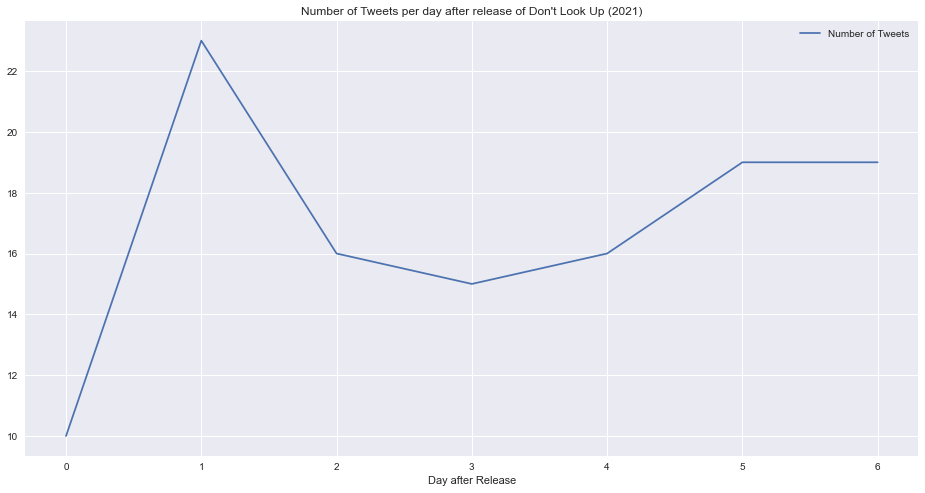

In [130]:
frequency_df.plot(x='Day after Release', 
             y='Number of Tweets', 
             title="Number of Tweets per day after release of Don't Look Up (2021)")